# Analyzing the data before starting


In [1]:
import pandas as pd

In [4]:
df=pd.read_csv("student_performance_sample.csv")
df.head()

,study_hour,attendance,past_score,internet,sleephour,passed
0,2,60,45,Yes,5,No
1,3,65,50,Yes,6,No
2,4,70,55,No,6,No
3,5,72,58,Yes,6,No
4,6,75,60,Yes,7,Yes


In [7]:
print(f'Rows:{df.shape[0]},Cols:{df.shape[1]}')
print("Data info")
print(df.info())

Rows:20,Cols:6
Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   study_hour  20 non-null     int64 
 1   attendance  20 non-null     int64 
 2   past_score  20 non-null     int64 
 3   internet    20 non-null     object
 4   sleephour   20 non-null     int64 
 5   passed      20 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.1+ KB
None


In [9]:
print(df.describe(include='all'))

        study_hour  attendance  past_score internet  sleephour passed
count    20.000000   20.000000   20.000000       20  20.000000     20
unique         NaN         NaN         NaN        2        NaN      2
top            NaN         NaN         NaN      Yes        NaN    Yes
freq           NaN         NaN         NaN       17        NaN     15
mean      8.350000   77.650000   67.800000      NaN   7.050000    NaN
std       3.360373    8.591765   10.724296      NaN   0.944513    NaN
min       2.000000   60.000000   45.000000      NaN   5.000000    NaN
25%       6.000000   71.500000   61.500000      NaN   6.000000    NaN
50%       8.500000   78.000000   68.500000      NaN   7.000000    NaN
75%      11.000000   85.000000   75.750000      NaN   8.000000    NaN
max      14.000000   90.000000   85.000000      NaN   8.000000    NaN


In [ ]:
print(df.isnull().sum())
print(df.ty)

study_hour    0
attendance    0
past_score    0
internet      0
sleephour     0
passed        0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder,S
le=LabelEncoder()
df['internet']=le.fit_transform(df['internet'])  # yes-1,no-0
df['passed']=le.fit_transform(df['passed']) # yes-1,no-0
df.head()

,study_hour,attendance,past_score,internet,sleephour,passed
0,2,60,45,1,5,0
1,3,65,50,1,6,0
2,4,70,55,0,6,0
3,5,72,58,1,6,0
4,6,75,60,1,7,1


# Student success Predictor

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Step1 and Step2------------------------------
le=LabelEncoder()
df['internet']=le.fit_transform(df['internet'])  # yes-1,no-0
df['passed']=le.fit_transform(df['passed']) # yes-1,no-0
df.head()

,study_hour,attendance,past_score,internet,sleephour,passed
0,2,60,45,1,5,0
1,3,65,50,1,6,0
2,4,70,55,0,6,0
3,5,72,58,1,6,0
4,6,75,60,1,7,1


In [ ]:
# Step 3--------------------------
scaler=StandardScaler()
feature=['study_hour','attendance','past_score','sleephour']
df_scaled=df.copy()
df_scaled[feature]=scaler.fit_transform(df[feature])
df_scaled.head()


,study_hour,attendance,past_score,internet,sleephour,passed
0,-1.938762,-2.107660,-2.181244,1,-2.226814,0
1,-1.633445,-1.510589,-1.702901,1,-1.140563,0
2,-1.328128,-0.913518,-1.224558,0,-1.140563,0
3,-1.022811,-0.674690,-0.937552,1,-1.140563,0
4,-0.717495,-0.316448,-0.746215,1,-0.054313,1


In [21]:
# Step 4----------------
X=df_scaled[feature]
y=df_scaled['passed']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
# Step 5 & 6-------------
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
# Step 7------------
print("Classification report:")
print(classification_report(y_test,y_pred))

print("Confusion matrix:")
confusion_mat=confusion_matrix(y_test,y_pred)
print(confusion_mat)

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Confusion matrix:
[[2 0]
 [0 2]]


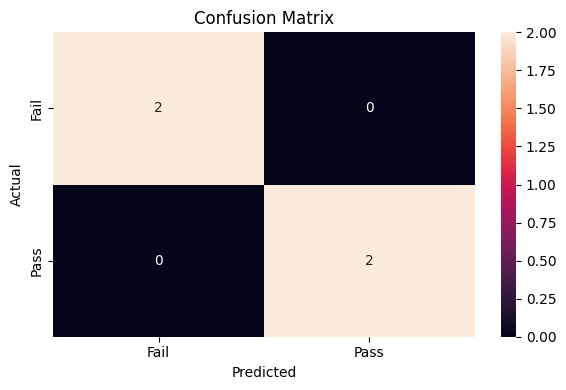

In [29]:
# Step 8-------------
plt.figure(figsize=(6,4))
sns.heatmap(confusion_mat,annot=True,fmt='d',xticklabels=["Fail","Pass"],yticklabels=["Fail",'Pass'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [32]:
# Testing the model
try:
    studyHour=float(input("Enter the study hour:"))
    Attendance=float(input("Enter the attendance:"))
    PastScore=float(input("Enter the past score:"))
    SleepHour=float(input("Enter the sleep hour:"))
    
    user_input_df=pd.DataFrame([{
        'study_hour':studyHour,
        'attendance':Attendance,
        'past_score':PastScore,
        'sleephour':SleepHour
        
    }])
    
    user_scaled_data=scaler.transform(user_input_df)
    prediction=model.predict(user_scaled_data)[0]
    print( user_scaled_data)
    result='Pass' if prediction==1 else "Fail"
    print(f'Prediction Based On input:{result}')
except Exception as e:
    print("An error occured:",e)

[[-0.10686089 -8.0783678  -5.52964487  8.6356946 ]]
Prediction Based On input:Pass


c:\Users\dcu25\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
